Pymaceuticals Inc.

Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame

pymaceutical_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

pymaceutical_complete


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice

mouse_metadata = pymaceutical_complete["Mouse ID"].nunique()
print(mouse_metadata)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


for i,x in enumerate(pymaceutical_complete.duplicated(subset=["Mouse ID", "Timepoint"])):
    if x == True:
        print(pymaceutical_complete.iloc[i, 0])


g989
g989
g989
g989
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

pymaceutical_complete_dup =pymaceutical_complete.loc[pymaceutical_complete["Mouse ID"]=="g989",:]
pymaceutical_complete_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

pymaceutical_complete_clean = pymaceutical_complete[~(pymaceutical_complete["Mouse ID"] == 'g989')].drop_duplicates()

# Print the resulting DataFrame
pymaceutical_complete_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

mouse_metadata_new=pymaceutical_complete_clean["Mouse ID"].nunique()
print(mouse_metadata_new)


248


Summary Statistics

In [7]:
# Calculate the mean, median, variance, standard deviation, and SEM for each group
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumor_table = np.mean(pymaceutical_complete_clean['Tumor Volume (mm3)'])
tumor_table = np.median(pymaceutical_complete_clean['Tumor Volume (mm3)'])
tumor_table = np.var(pymaceutical_complete_clean['Tumor Volume (mm3)'])
tumor_table = np.std(pymaceutical_complete_clean['Tumor Volume (mm3)'])

# since numpy has no attribute sem, I calculated in this way

tumor_table= pymaceutical_complete_clean['Tumor Volume (mm3)'].sem()



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

pymaceutical_complete_clean_data = pymaceutical_complete_clean.groupby("Drug Regimen")

# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)


tumor_table = pymaceutical_complete_clean_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Print the summary statistics table
# Using the aggregation method, produce the same summary statistics in a single line

tumor_table





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Assemble the resulting series into a single summary DataFrame

tumor_table_summary = pd.DataFrame({
     "Tumor Volume mean":tumor_table["mean"],
     "Tumor Volume median":tumor_table["median"],
     "Tumor Volume var":tumor_table["var"],
     "Tumor Volume std":tumor_table["std"],
     "Tumor Volume sem":tumor_table["sem"],
})

tumor_table_summary

,Tumor Volume mean,Tumor Volume median,Tumor Volume var,Tumor Volume std,Tumor Volume sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Create Bar charts and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

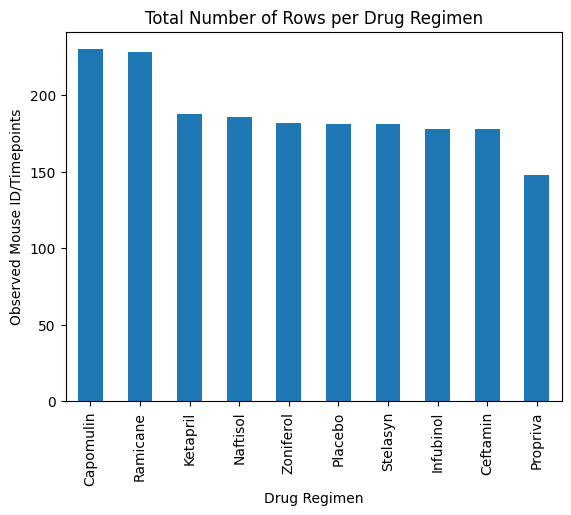

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# use value_counts function to count the number of occurence of drug regimen in dataframe
regimen_counts = pymaceutical_complete_clean['Drug Regimen'].value_counts()
print(regimen_counts)

# plot the bar chart for regimen_counts by creating the functoion

regimen_counts.plot.bar()

# customize the bar chart by adding the title and axis

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse ID/Timepoints')

# display by using plt.show
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

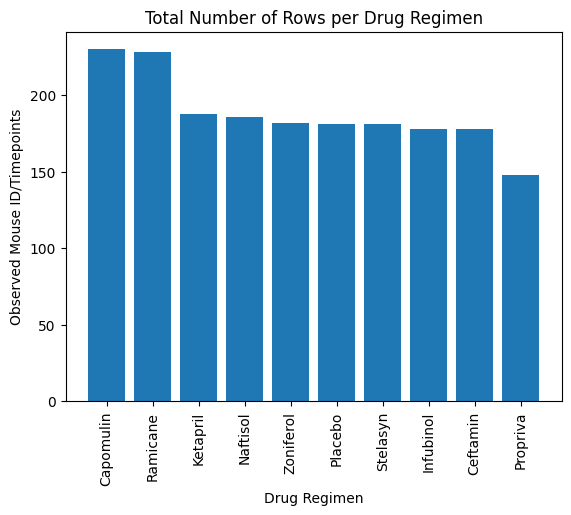

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# use value_counts function to count the number of occurence of drug regimen in dataframe
regimen_counts =pymaceutical_complete_clean ['Drug Regimen'].value_counts()

# get the drug regimen and corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

#create bar plot by using pyplot

plt.bar(regimens, counts)


# customize the chart by adding title and axis

plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse ID/Timepoints')

# Rotate the x-axis labels if needed. If it is not rotate then name of drug regimen will not displayed properly
plt.xticks(rotation=90)

# display by using plt.show
plt.show

In [12]:
pymaceutical_complete_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


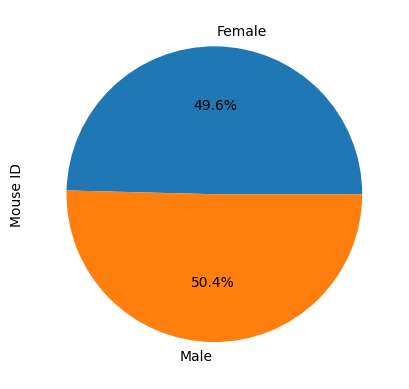

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# mice distrubution in pymaceutical_complete_clean
mice_distribution =pymaceutical_complete_clean.groupby("Sex")["Mouse ID"].nunique()

# Create the pie plot
mice_distribution.plot.pie(autopct='%1.1f%%')

# Display the plot
plt.show()

In [14]:

# mice distrubution in pymaceutical_complete_clean
mice_distribution =pymaceutical_complete_clean.groupby("Sex")["Mouse ID"].nunique()
mice_distribution

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

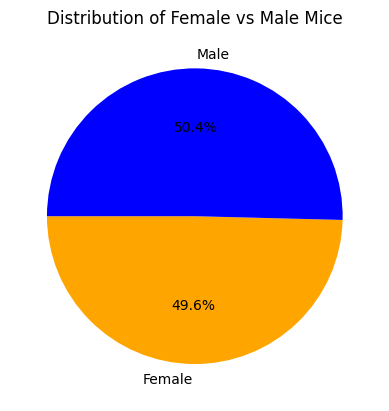

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Distribution
mice_distribution =pymaceutical_complete_clean.groupby("Sex")["Mouse ID"].nunique()
mice_distribution

# Pie chart labels
labels = ['Female', 'Male']
female_mice= 123
male_mice= 125

# Pie chart values
sizes = [female_mice, male_mice]

# Pie chart colors
colors = ['orange', 'blue']

# Create the pie chart by using pyplot function
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

Calculate Quartiles, Find Outliers, and Create a Box Plot

In [16]:
pymaceutical_complete_clean.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = pymaceutical_complete_clean[pymaceutical_complete_clean['Drug Regimen'].isin(drug_regimens)]

# group by mouse id
# Start by getting the last (greatest) timepoint for each mouse
grouped_data_by_mouseid = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Step 3: Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
merged_data_pymaceutical = pd.merge(grouped_data_by_mouseid, pymaceutical_complete_clean, on=['Mouse ID', 'Timepoint'], how='left')

pd.DataFrame(merged_data_pymaceutical[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Timepoint']])



,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
0,a203,Infubinol,67.973419,45
1,a251,Infubinol,65.525743,45
2,a275,Ceftamin,62.999356,45
3,a411,Ramicane,38.407618,45
4,a444,Ramicane,43.047543,45
...,...,...,...,...
95,y769,Ceftamin,68.594745,45
96,y793,Capomulin,31.896238,45
97,y865,Ceftamin,64.729837,45
98,z578,Ramicane,30.638696,45


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
potential_outliers = {}

# Create empty list to fill with tumor vol data (for plotting)

for drug in drugs:
    tumor_data_vol = merged_data_pymaceutical.loc[merged_data_pymaceutical['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    if len(tumor_data_vol) > 0:
        Q1 = np.percentile(tumor_data_vol, 25)
        Q3 = np.percentile(tumor_data_vol, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = tumor_data_vol[(tumor_data_vol < lower_bound) | (tumor_data_vol > upper_bound)]
        
        if len(outliers) > 0:
            potential_outliers[drug] = outliers

# Print the tumor volumes for each drug regimen in the subset
subset_data = merged_data_pymaceutical.loc[merged_data_pymaceutical['Drug Regimen'].isin(drugs)]
for drug in drugs:
    tumor_data_vol = subset_data.loc[subset_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    print(f"Tumor volumes for {drug}:")
    print(tumor_data_vol)

# Print the potential outliers for each drug regimen
for drug, outliers in potential_outliers.items():
    print(f"Potential outliers for {drug}:")
    print(outliers)

if len(potential_outliers) == 0:
    print("No outliers found.")

Tumor volumes for Capomulin:
9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
Tumor volumes for Ramicane:
3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64
Tumor volumes for Infubinol:
0     67.973419
1     65.525743


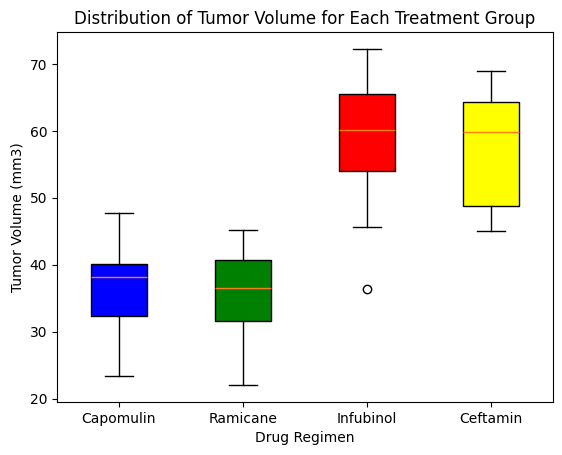

In [19]:

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volumes for each treatment group
tumor_volumes = []
for drug in drugs:
    tumor_data_vol = merged_data_pymaceutical.loc[merged_data_pymaceutical['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volumes.append(tumor_data_vol)

# Create the box plot
box_plot = plt.boxplot(tumor_volumes, labels=drugs, patch_artist=True)

# Set the fill color for each box
colors = ['blue', 'green', 'red', 'yellow']
for box, color in zip(box_plot['boxes'], colors):
    box.set(facecolor=color)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

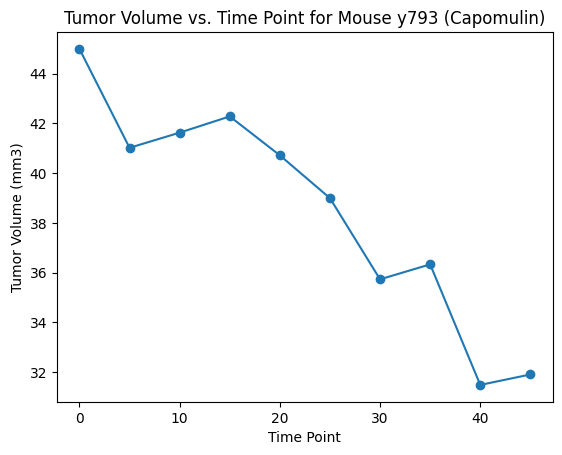

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for mice treated with Capomulin
capomulin_data = pymaceutical_complete_clean.loc[pymaceutical_complete_clean['Drug Regimen'] == 'Capomulin']

# Choose a specific mouse from the filtered data
mouse_id = 'y793'  # Replace 'your_mouse_id' with the actual mouse ID

# Extract the time points and tumor volumes for the selected mouse
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID'] == mouse_id]
time_points = mouse_data['Timepoint']
tumor_volumes = mouse_data['Tumor Volume (mm3)']

# Plot the tumor volumes vs. time points
plt.plot(time_points, tumor_volumes, marker='o')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


In [21]:
pymaceutical_complete_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


/var/folders/33/s1v3z17x5vs0mgg845k9r16r0000gp/T/ipykernel_2784/501067260.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin_data['Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')


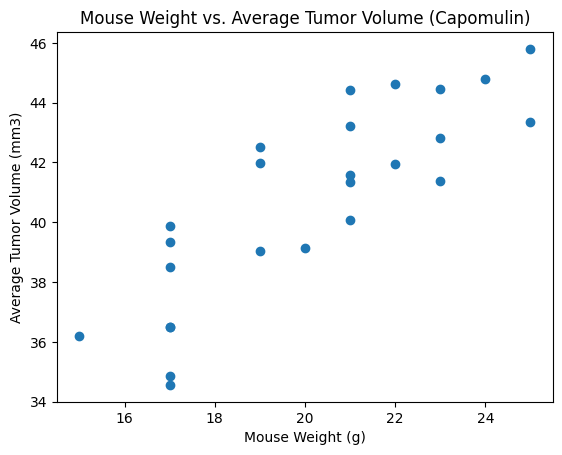

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_data = pymaceutical_complete_clean.loc[pymaceutical_complete_clean['Drug Regimen'] == 'Capomulin']

# Convert 'Tumor Volume (mm3)' column to numeric dtype
capomulin_data['Tumor Volume (mm3)'] = pd.to_numeric(capomulin_data['Tumor Volume (mm3)'], errors='coerce')

# Group the filtered data by mouse ID and calculate the average tumor volume and weight
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
average_tumor_volume = grouped_data['Tumor Volume (mm3)']
mouse_weight = grouped_data['Weight (g)']

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

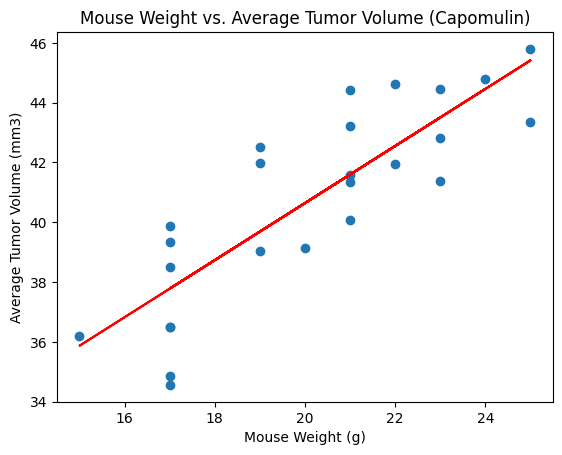

Correlation Coefficient: 0.8419363424694721


In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_data = pymaceutical_complete_clean.loc[pymaceutical_complete_clean['Drug Regimen'] == 'Capomulin']

# Group the filtered data by mouse ID and calculate the average tumor volume and weight
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})
average_tumor_volume = grouped_data['Tumor Volume (mm3)']
mouse_weight = grouped_data['Weight (g)']

# Calculate the correlation coefficient
correlation_coefficient = average_tumor_volume.corr(mouse_weight)

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the linear regression line
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weight, average_tumor_volume)
regress_values = slope * mouse_weight + intercept
plt.plot(mouse_weight, regress_values, color='red')

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")